In [1]:
import numpy as np
from scipy.linalg import toeplitz, eigvals
from pseudopy import NonnormalMeshgrid
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
import Random_Matrix as RM


sns.set()
%matplotlib inline

np.random.seed(140)

When working with numerical matrix calculations, it is often desirable to have eigenvalues that are seperated. In this section we will demonstrate that adding some small random noise can disperse the eigenvalues of a matrix. This section will reproduce the example given by the paper [*Pseudospectral Shattering, the Sign Function, and Diagonalization in Nearly Matrix Multiplication Time*](https://arxiv.org/abs/1912.08805) by Jess Banks, Jorge Garza Vargas, Archit Kulkarni, and Nikhil Srivastava. 

# Shattering the Pseudospectrum

We will demonstrate that perturbing a matrix with random noise by adding a Ginibre matrix can shatter the pseudospectrum, by which we mean separate the eigenvalues from each other and shrink the pseudospectrum. We begin by creating a five by five Toeplitz matrix with zeros on the diagonal and an independent standard real Gaussians repeated along each diagonal above the main diagonal.

In [2]:
A = toeplitz(np.zeros(5), np.random.normal(size=5))
A

array([[ 0.        ,  0.29599552,  0.18548011, -0.82809842, -0.03192753],
       [ 0.        ,  0.        ,  0.29599552,  0.18548011, -0.82809842],
       [ 0.        ,  0.        ,  0.        ,  0.29599552,  0.18548011],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.29599552],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

There is only one distinct eigenvalue (zero) with multiplicity 5. We visulize the eigenvalue below and plot its pseudospectral.

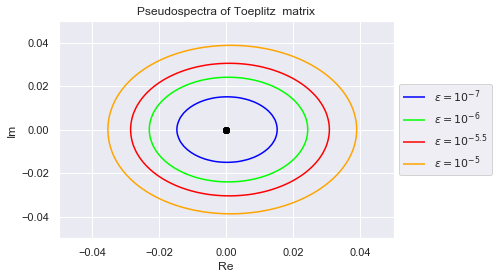

In [3]:
## Create Meshgrid
mesh = NonnormalMeshgrid(A, real_min=-.05, real_max=.05, imag_min=-.05, imag_max=.05, real_n=100, imag_n=100)

## Create Contours 
levels = [10**(-7), 10**(-6), 10**(-5.5), 1e-5]
colors = ["blue", "lime", "red", "orange"]
contours = plt.contour(mesh.Real, mesh.Imag, mesh.Vals, levels=levels, colors=colors)

## Create Legend 
legend_elements = contours.legend_elements()[0]
contour_names = ['$\epsilon=10^{-7}$','$\epsilon=10^{-6}$', '$\epsilon=10^{-5.5}$', '$\epsilon=10^{-5}$']
plt.legend(legend_elements, contour_names, loc='center left', bbox_to_anchor=(1, 0.5))

## Plot Eigenvalues
λs = eigvals(A)
plt.scatter(λs.real, λs.imag, c="black")

## Label Plot
plt.xlim(-.05,.05)
plt.ylim(-.05,.05)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Pseudospectra of Toeplitz  matrix");

We will now perturb $A$ by adding a Ginibre matrix. To make the purbation small, we will scale the noise down by $10^{-6}$. Below we create the matrix $A + 10^{-6} G$ where $G$ is a Ginibre matrix.

In [4]:
A_perturbed = A + RM.Generate_Ginibre(5)*1e-6

Below we visualize the eigenvalues of this perturbed matrix and its pseudospectrum.

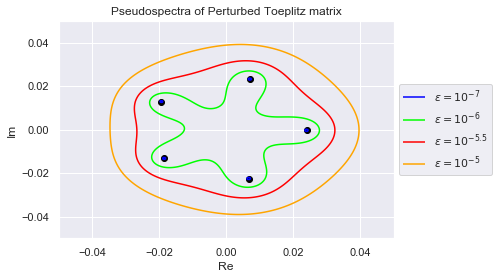

In [5]:
## Create Meshgrid
mesh = NonnormalMeshgrid(A_perturbed, real_min=-.05, real_max=.05, imag_min=-.05, imag_max=.05, real_n=250, imag_n=250)

## Create Contours 
contours = plt.contour(mesh.Real, mesh.Imag, mesh.Vals, levels=levels, colors=colors)

## Create Legend 
legend_elements = contours.legend_elements()[0]
plt.legend(legend_elements, contour_names, loc='center left', bbox_to_anchor=(1, 0.5))

## Plot Eigenvalues
λs = eigvals(A_perturbed)
plt.scatter(λs.real, λs.imag, c="black")

## Label Plot
plt.xlim(-.05,.05)
plt.ylim(-.05,.05)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("Pseudospectra of Perturbed Toeplitz matrix");

As we can see, the eigenvalues have spread out. The $(10^{-7})$-pseudospectrum is so tiny, we can barely see it encircling the eigenvalues in the plot. Below we zoom into each eigenvalue so that we may better observe the $(10^{-7})$-pseudospectrum. The plots are generated in increasing order of the eigenvalues' norms, so $\lambda_0$ has the smallest norm

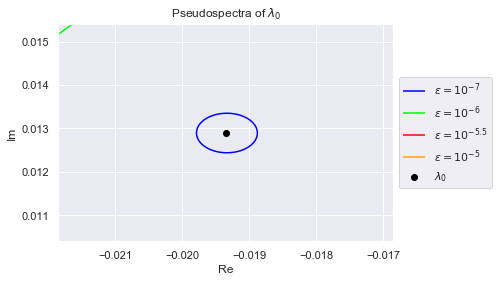

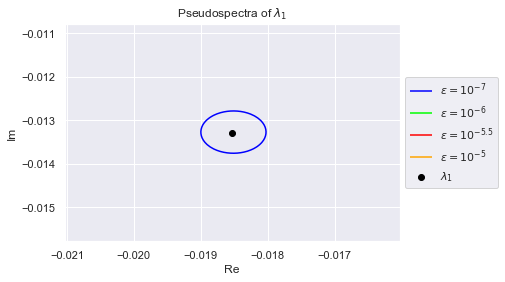

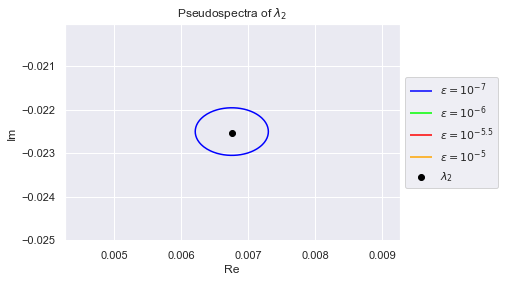

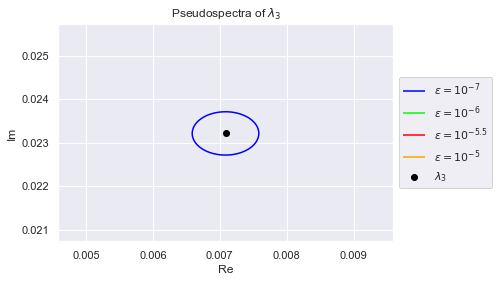

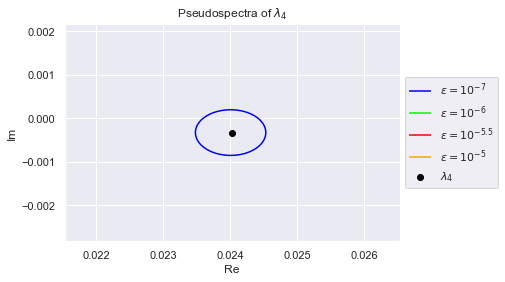

In [6]:
## lambda_0 is smallest eigenvalue
λs.sort()
for i in range(len(λs)):
    λ = λs[i]

    ## Create Meshgrid
    mesh = NonnormalMeshgrid(A_perturbed, real_min=λ.real -.0025 , real_max=λ.real + .0025, 
                             imag_min=λ.imag -.0025, imag_max=λ.imag + .0025, real_n=100, imag_n=100)

    ## Create Contours 
    contours = plt.contour(mesh.Real, mesh.Imag, mesh.Vals, levels=levels, colors=colors)

    ## Plot Eigenvalues
    λ_scatter = plt.scatter(λ.real, λ.imag, c="black")
    contour_names = ['$\epsilon=10^{-7}$','$\epsilon=10^{-6}$', '$\epsilon=10^{-5.5}$', '$\epsilon=10^{-5}$', f"$\lambda_{i}$"]
    
    ## Create Legend 
    legend_elements = np.append(contours.legend_elements()[0], λ_scatter)
    plt.legend(legend_elements, contour_names, loc='center left', bbox_to_anchor=(1, 0.5))

    ## Label Plot
    plt.xlim(λ.real -.0025, λ.real + .0025)
    plt.ylim(λ.imag -.0025, λ.imag + .0025)
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.title(f"Pseudospectra of $\lambda_{i}$")
    plt.show();

Clearly, no pair of eigenvalues are in each others $(10^{-7})$-pseudospectrum. This is desirable because if an algorithm is numerically stable for $10^{-7}$, it won't confuse any two eigenvalues. 

# Eigenvalue Gaps

So how often and how well do Ginibre matricies shatter the pseudospectrum? First we need a metric that measures how well the pseudospectrum is shattered

<hr>

**Definition**: The minimum eigenvalue gap of a matrix $A$, denoted $\text{gap}(A)$, is defined as

$$\text{gap}(A) = \min_{i \neq j} |\lambda_i - \lambda_j| $$

where $\lambda_i$ and $\lambda_j$ are eigenvalues of $A$

<hr>

Banks,Garza Vargas, Kulkarni, and Srivastava proved the following theorem about the effects on the eigenvalue gap and eigenvector condition number of a matrix when perturbing it with a Ginibre matrix.

<hr>

**Theorem**: Suppose $A \in \mathbb{C}^{n \times n}$ with $||A|| \leq 1$, and $\gamma \in (0, \frac{1}{2})$. Let $G_n$ be an $n \times n$ Ginibre matrix and $X=A+\gamma G_n$. Then 

$$\kappa_V(X) \leq \frac{n^2}{\gamma}, \ \ \text{gap}(X) \geq \frac{\gamma^4}{n^5}, \ \ \text{ and } \ ||G_n|| \leq 4$$

with probability at least $1-\frac{1}{n}- O(\frac{1}{n^2})$, where the implied constant is no more than $600$.

<hr>